In [48]:
#https://www.youtube.com/watch?v=i_LwzRVP7bg


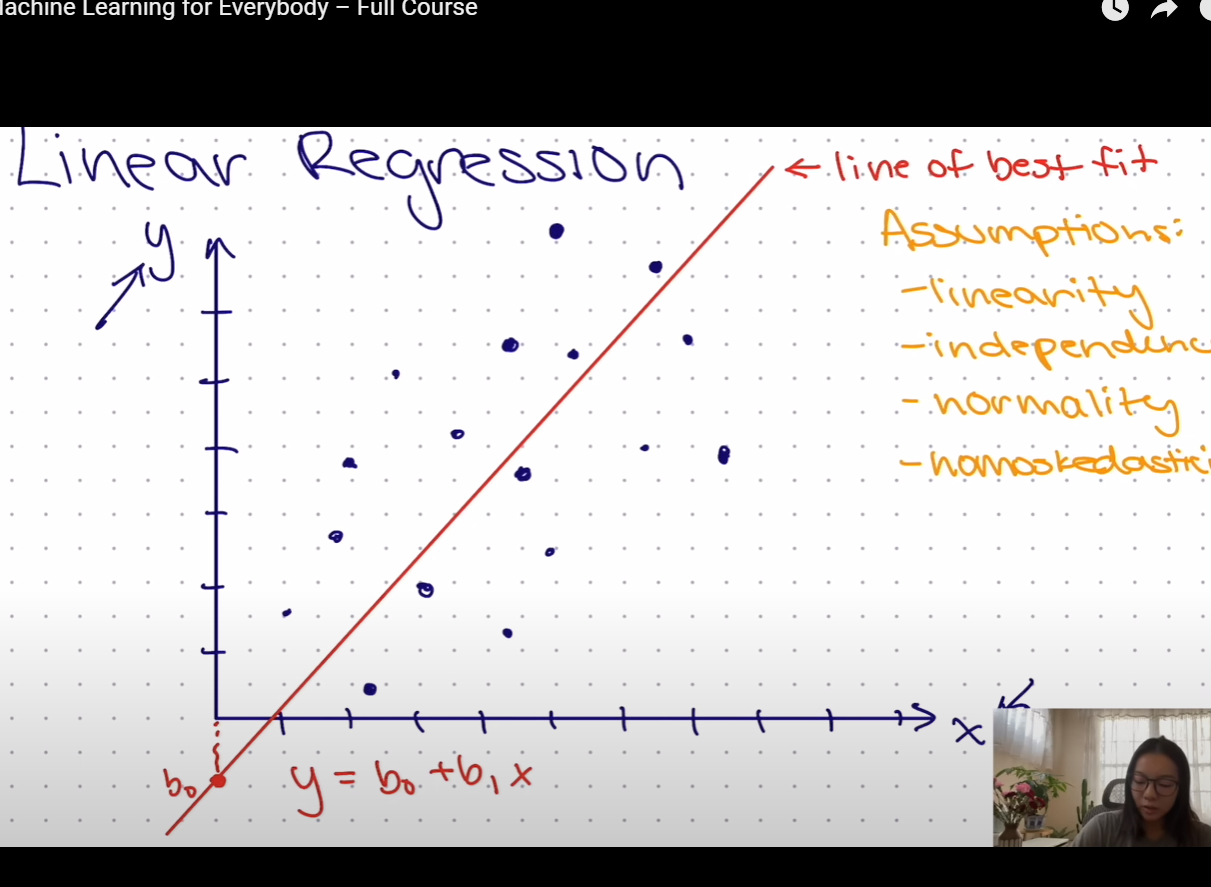

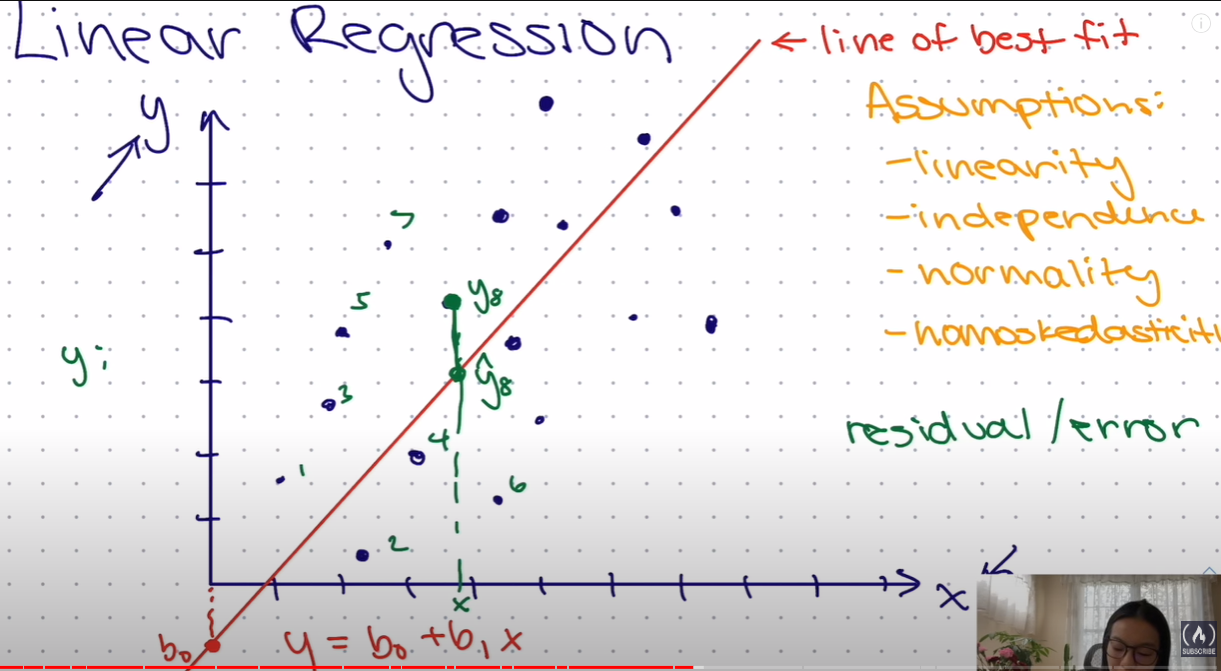

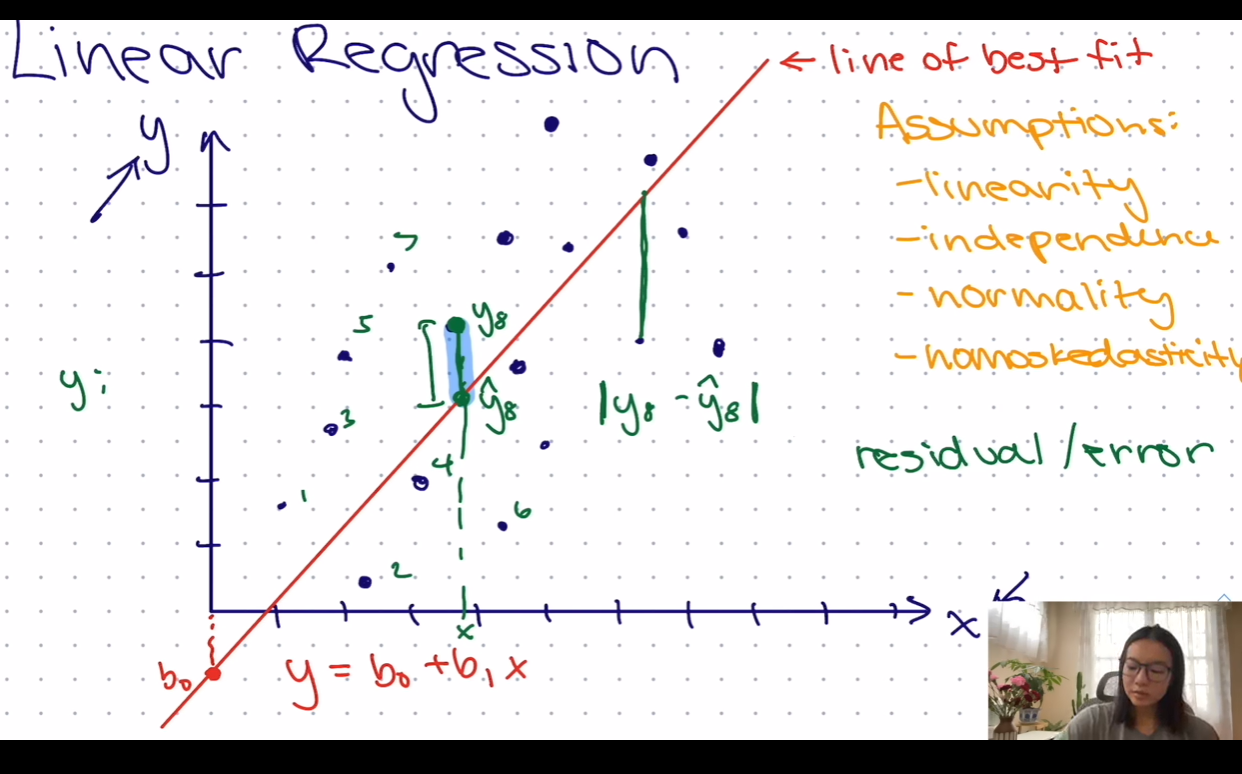

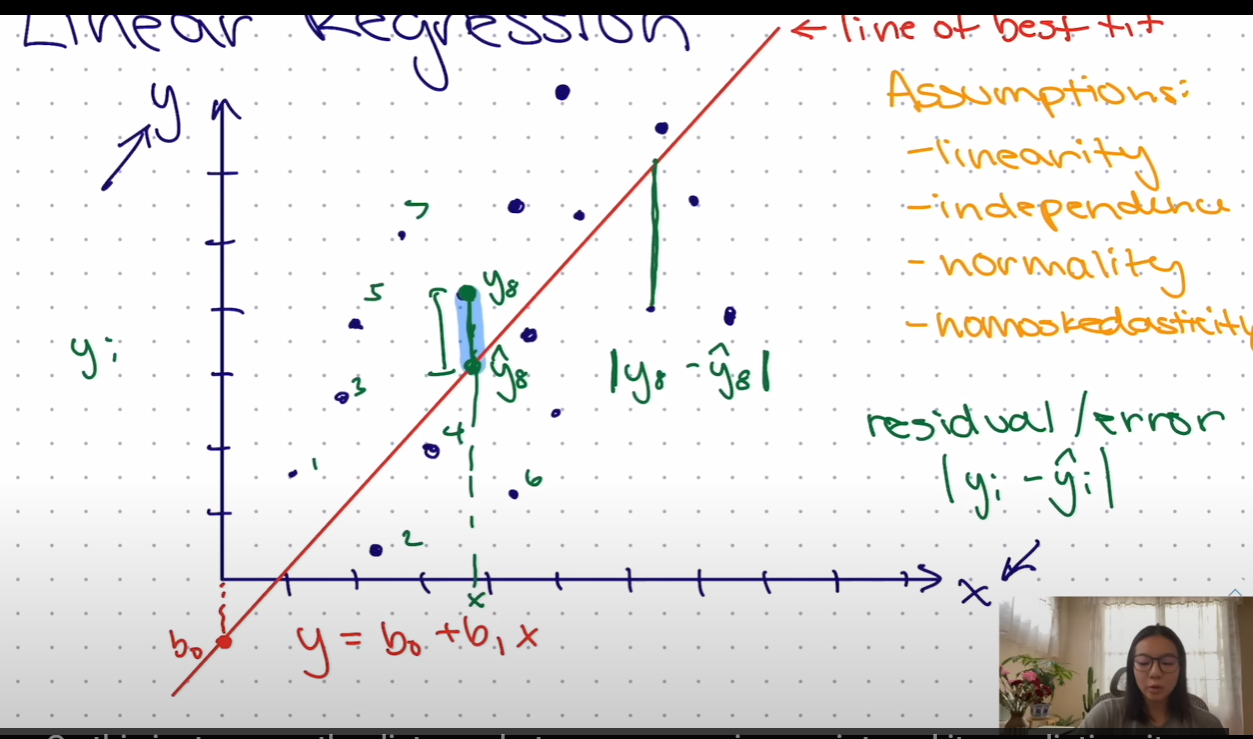

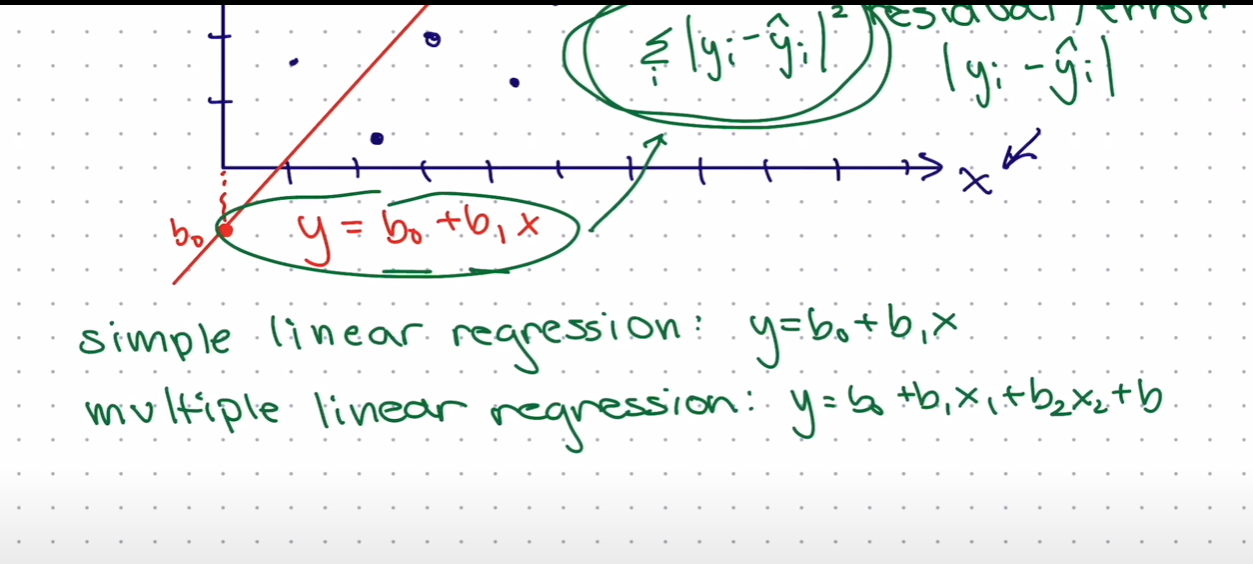

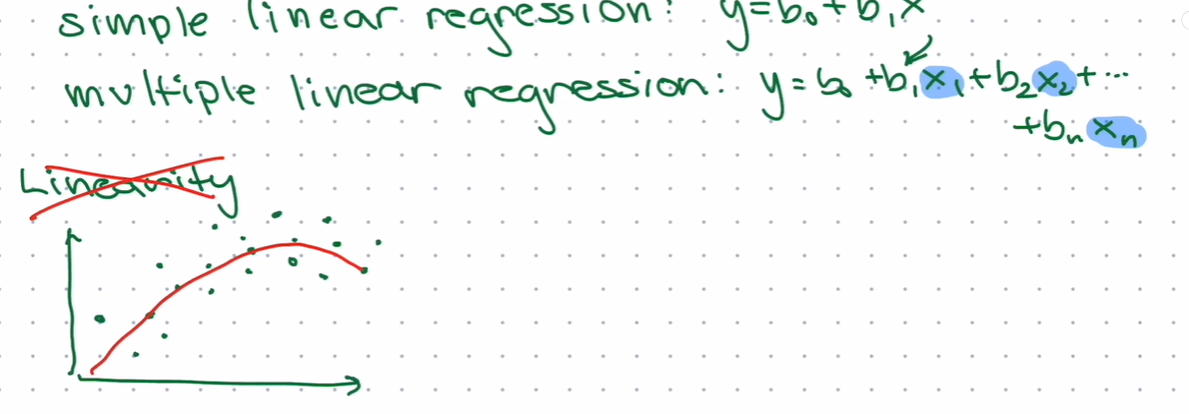

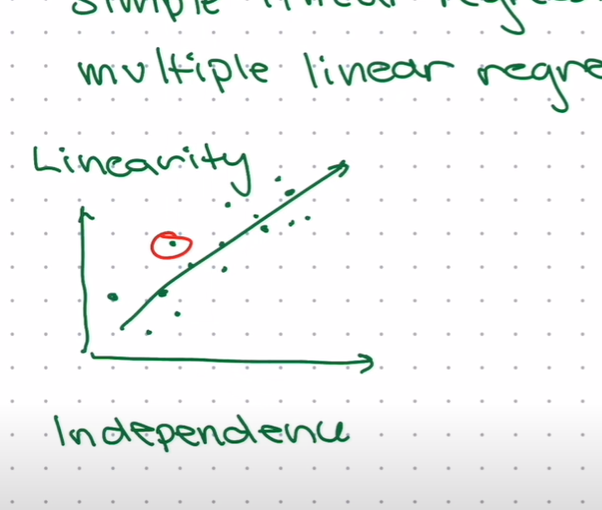

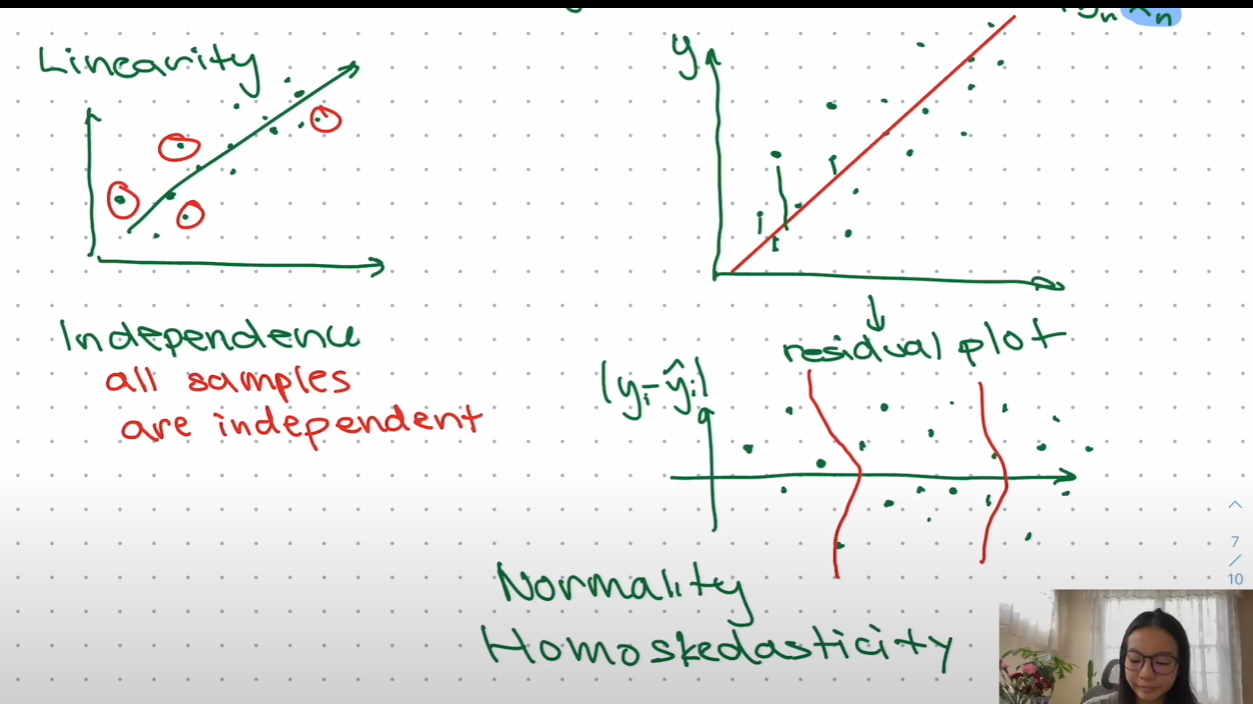

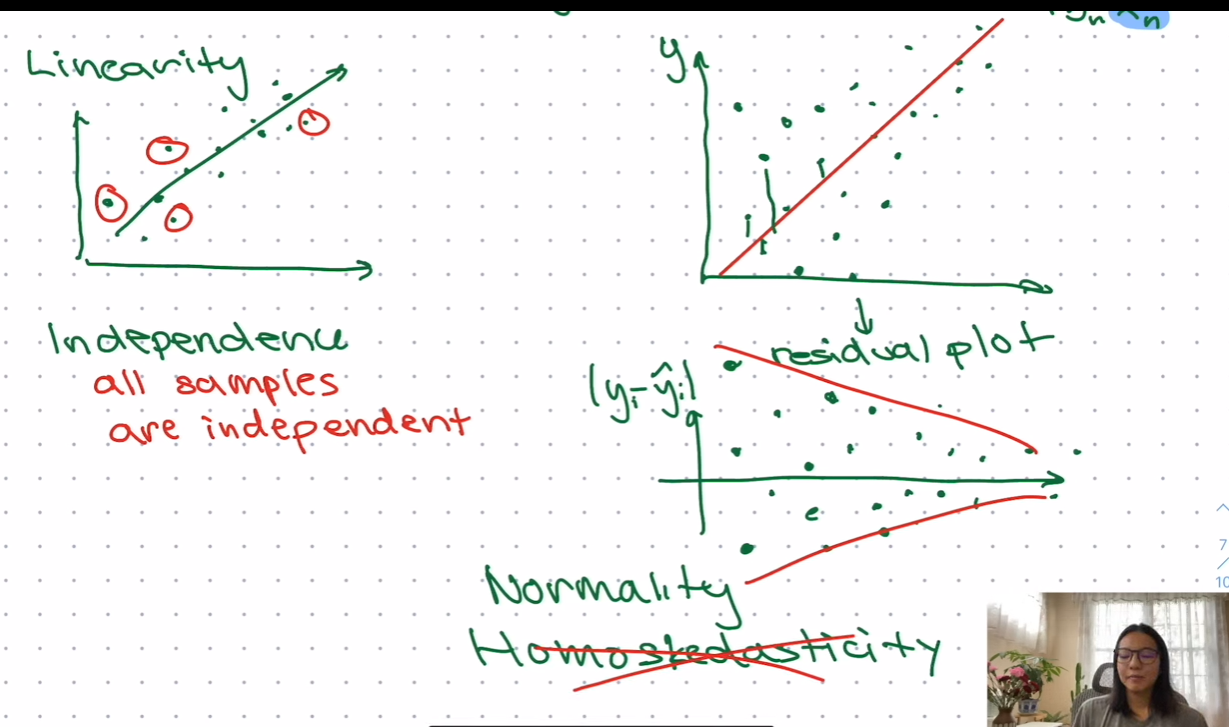

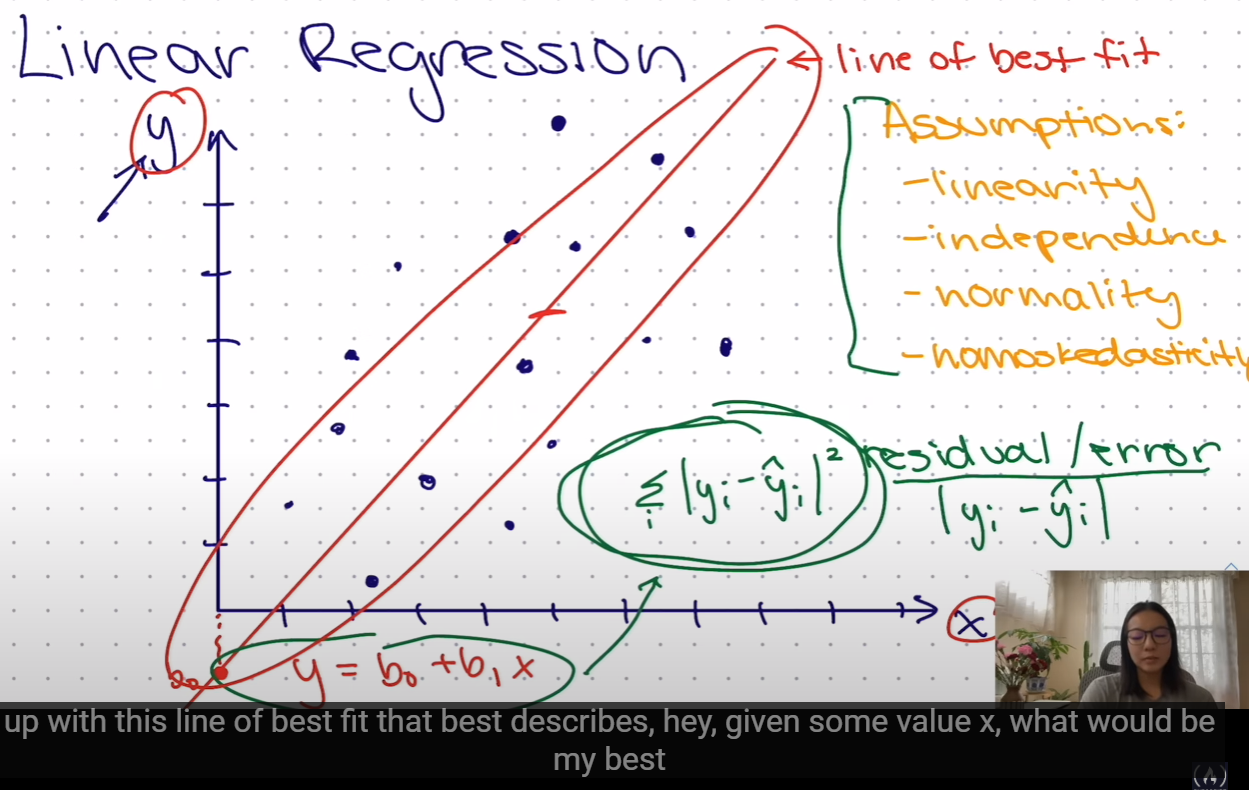

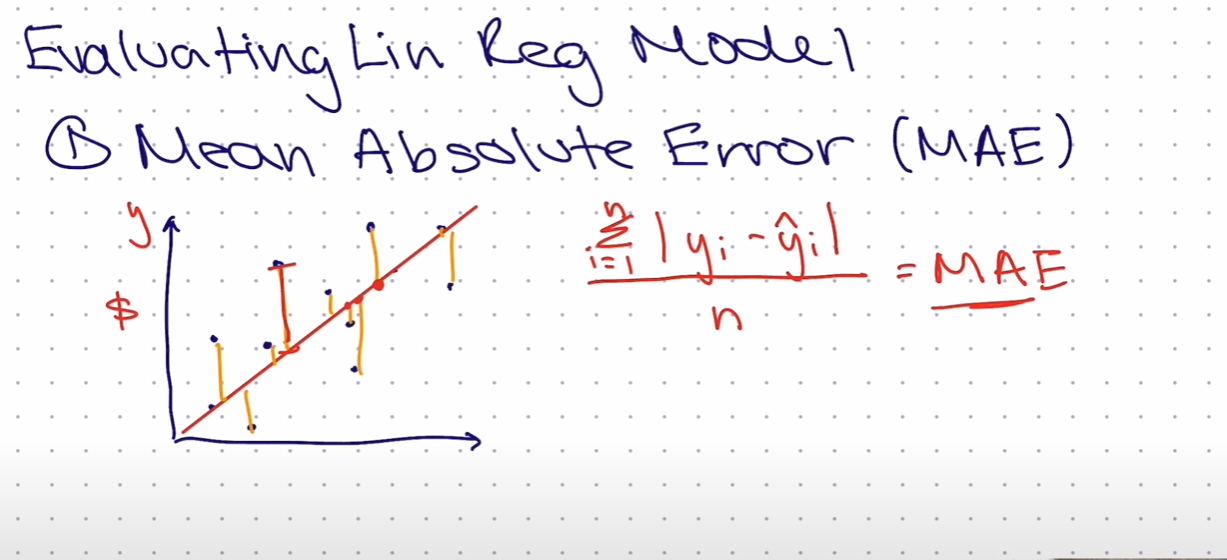

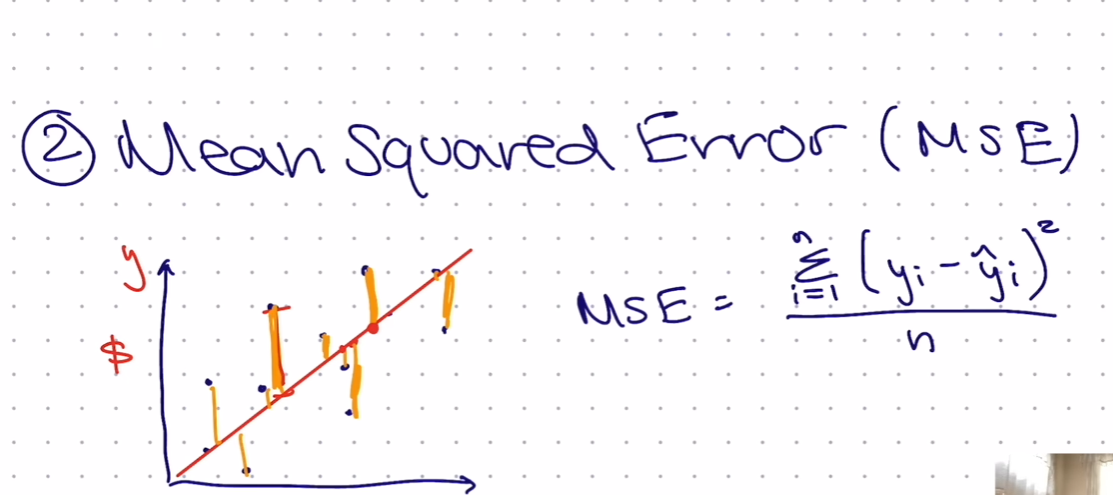

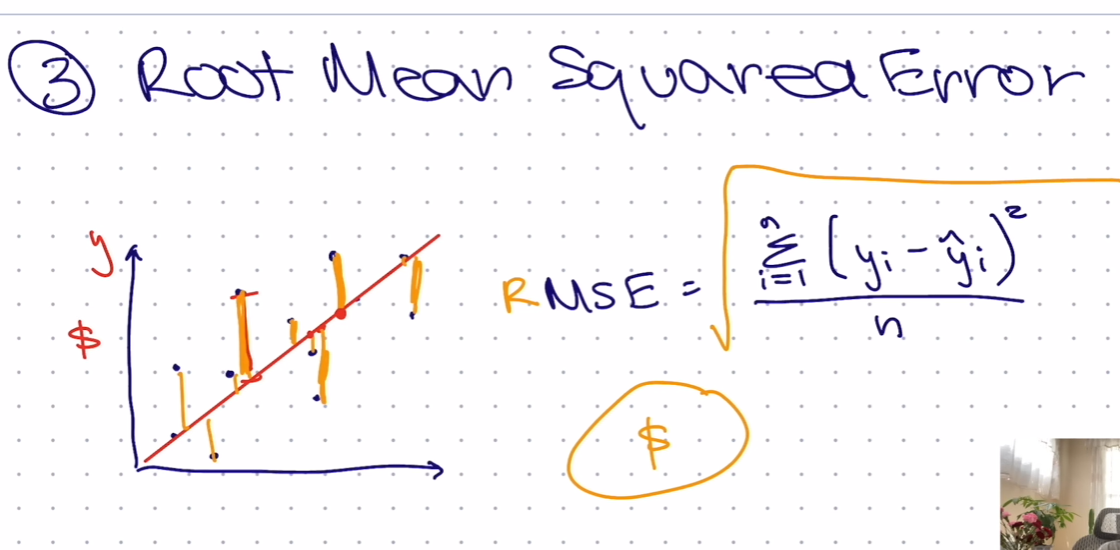

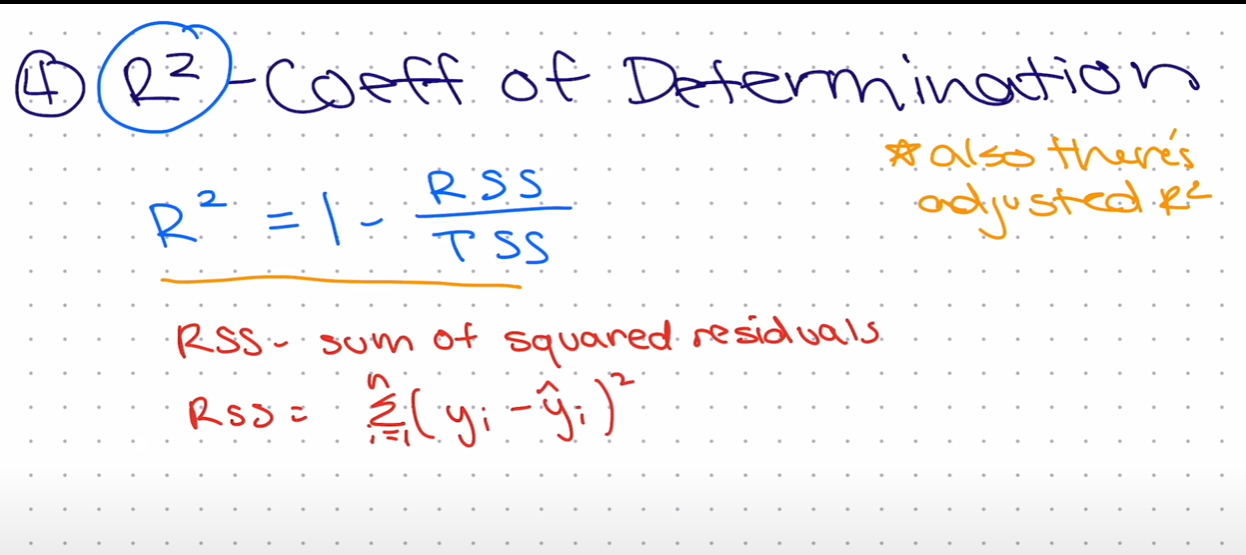

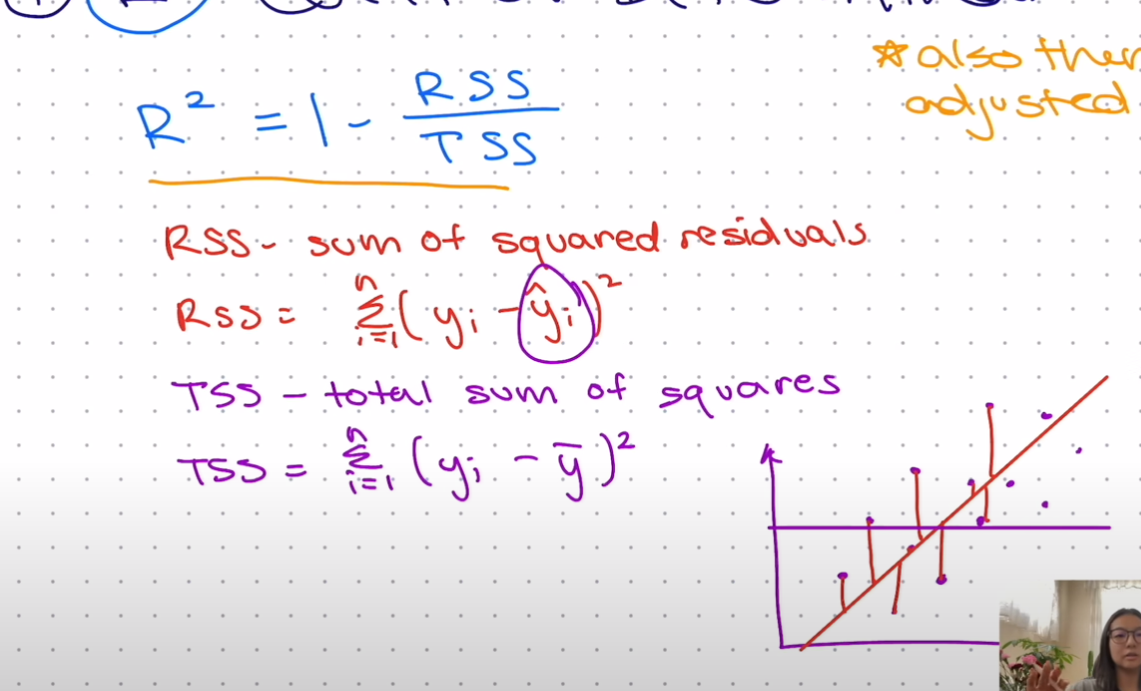

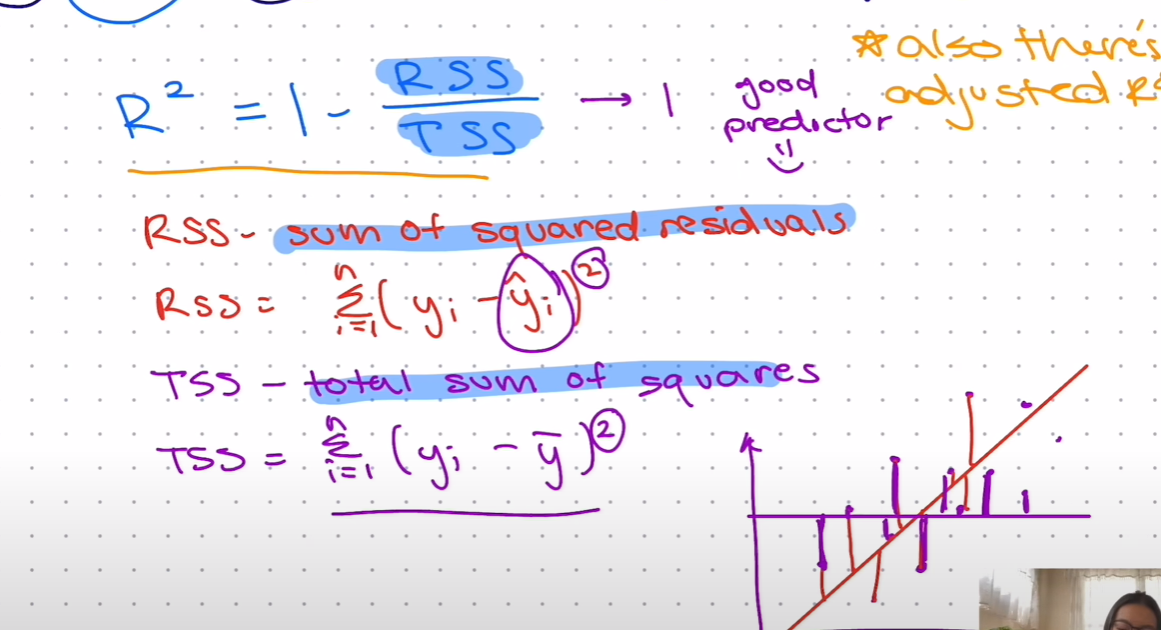

 Bikes dataset: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand
        Seoul Bike Sharing Demand

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [50]:

# Try reading the file with different encodings
encodings = ['utf-8', 'latin1', 'ISO-8859-1']

df2 = pd.read_csv("SeoulBikeData.csv", sep =",", encoding=encodings[1])

In [51]:
df2

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [52]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv", encoding='latin').drop(["Date", "Holiday", "Seasons"], axis=1)
#axis = 1 colunas

In [53]:
df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm) Functioning Day  
0              0.0            0.0             Yes  
1              0.0            0.0             Yes  
2              0.0            0.0             Yes  
3              0.0            0.0             Yes  
4              0.0            0.0             Yes  
...            ...            ...             ...  
8755           0.0            0.0             Yes  
8756           0.0            0.0             Yes  
8757           0.0            0.0             Yes  
8758           0.0            0.0             Yes  
8759           0.0            0.0             Yes  

[8760 rows x 11 columns]

In [54]:
#02:37:29

In [55]:
df.columns = dataset_cols

In [56]:
df

bike_count  hour  temp  humidity  wind  visibility  dew_pt_temp  \
0            254     0  -5.2        37   2.2        2000        -17.6   
1            204     1  -5.5        38   0.8        2000        -17.6   
2            173     2  -6.0        39   1.0        2000        -17.7   
3            107     3  -6.2        40   0.9        2000        -17.6   
4             78     4  -6.0        36   2.3        2000        -18.6   
...          ...   ...   ...       ...   ...         ...          ...   
8755        1003    19   4.2        34   2.6        1894        -10.3   
8756         764    20   3.4        37   2.3        2000         -9.9   
8757         694    21   2.6        39   0.3        1968         -9.9   
8758         712    22   2.1        41   1.0        1859         -9.8   
8759         584    23   1.9        43   1.3        1909         -9.3   

      radiation  rain  snow functional  
0           0.0   0.0   0.0        Yes  
1           0.0   0.0   0.0        Yes  
2           0.0   0.0   0.0        Yes  
3           0.0   0.0   0.0        Yes  
4           0.0   0.0   0.0        Yes  
...         ...   ...   ...        ...  
8755        0.0   0.0   0.0        Yes  
8756        0.0   0.0   0.0        Yes  
8757        0.0   0.0   0.0        Yes  
8758        0.0   0.0   0.0        Yes  
8759        0.0   0.0   0.0        Yes  

[8760 rows x 11 columns]

In [57]:

df["functional"] = (df["functional"] == "Yes").astype(int)
df.head()

bike_count  hour  temp  humidity  wind  visibility  dew_pt_temp  radiation  \
0         254     0  -5.2        37   2.2        2000        -17.6        0.0   
1         204     1  -5.5        38   0.8        2000        -17.6        0.0   
2         173     2  -6.0        39   1.0        2000        -17.7        0.0   
3         107     3  -6.2        40   0.9        2000        -17.6        0.0   
4          78     4  -6.0        36   2.3        2000        -18.6        0.0   

   rain  snow  functional  
0   0.0   0.0           1  
1   0.0   0.0           1  
2   0.0   0.0           1  
3   0.0   0.0           1  
4   0.0   0.0           1

In [58]:
#usando específica hora
df = df[df["hour"] == 12]
display(df)

bike_count  hour  temp  humidity  wind  visibility  dew_pt_temp  \
12           449    12   1.7        23   1.4        2000        -17.2   
36           479    12   4.3        41   1.3        1666         -7.8   
60           333    12   5.8        85   1.7         349          3.4   
84           393    12  -0.3        38   4.8        1823        -12.9   
108          321    12  -2.3        25   0.0        1962        -19.7   
...          ...   ...   ...       ...   ...         ...          ...   
8652         752    12   9.1        57   1.1         562          1.0   
8676         672    12   9.3        61   1.5         390          2.1   
8700         635    12   7.9        14   1.7        1688        -18.0   
8724         661    12   5.6        27   0.3        1522        -11.9   
8748         720    12   6.6        35   1.3        1409         -7.8   

      radiation  rain  snow  functional  
12         1.11   0.0   0.0           1  
36         1.09   0.0   0.0           1  
60         0.43   0.0   0.0           1  
84         1.11   0.0   0.0           1  
108        0.00   0.0   0.0           1  
...         ...   ...   ...         ...  
8652       1.69   0.0   0.0           1  
8676       0.85   0.0   0.0           1  
8700       1.81   0.0   0.0           1  
8724       0.34   0.0   0.0           1  
8748       1.70   0.0   0.0           1  

[365 rows x 11 columns]

In [59]:
df = df.drop(["hour"], axis=1)

In [60]:
df.head()

bike_count  temp  humidity  wind  visibility  dew_pt_temp  radiation  \
12          449   1.7        23   1.4        2000        -17.2       1.11   
36          479   4.3        41   1.3        1666         -7.8       1.09   
60          333   5.8        85   1.7         349          3.4       0.43   
84          393  -0.3        38   4.8        1823        -12.9       1.11   
108         321  -2.3        25   0.0        1962        -19.7       0.00   

     rain  snow  functional  
12    0.0   0.0           1  
36    0.0   0.0           1  
60    0.0   0.0           1  
84    0.0   0.0           1  
108   0.0   0.0           1

In [61]:
df.columns[1:]

Index(['temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation',
       'rain', 'snow', 'functional'],
      dtype='object')

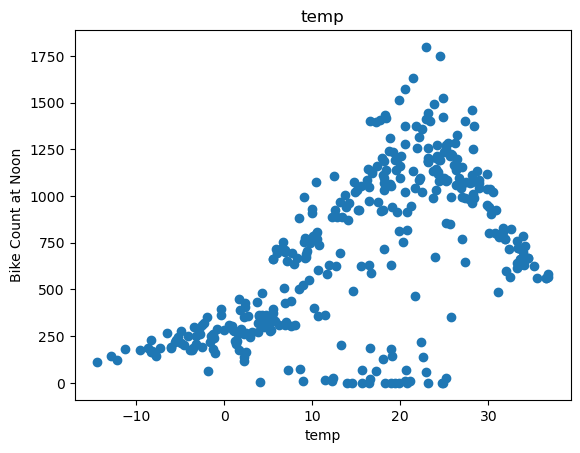

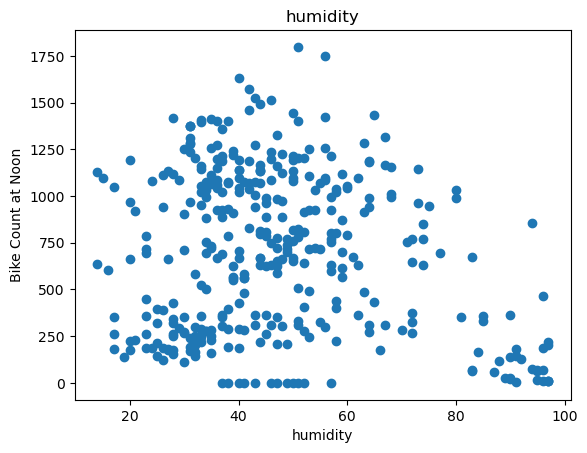

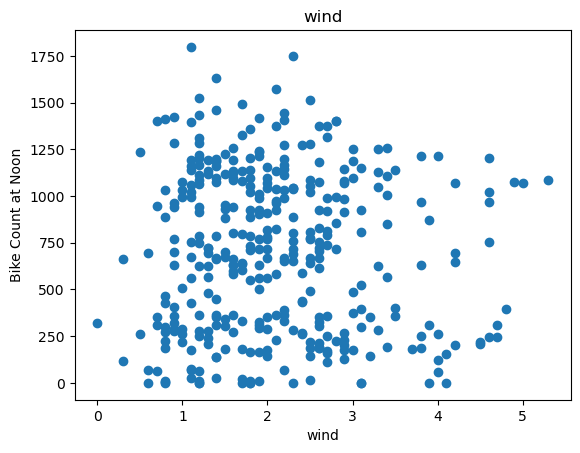

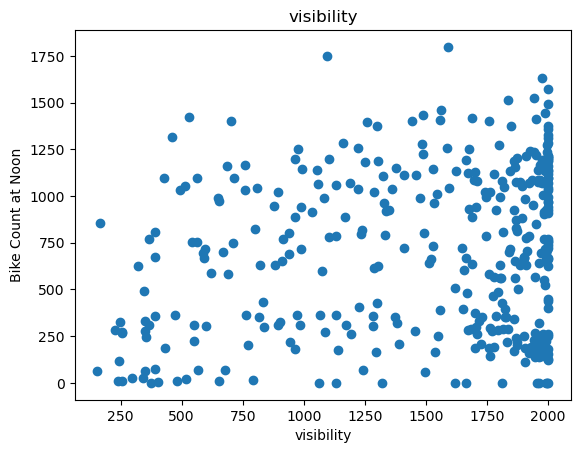

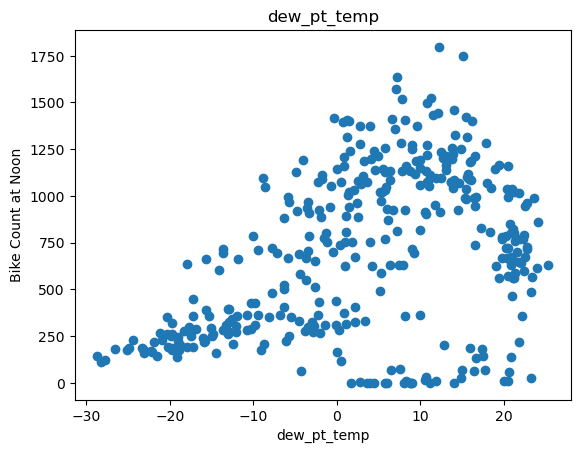

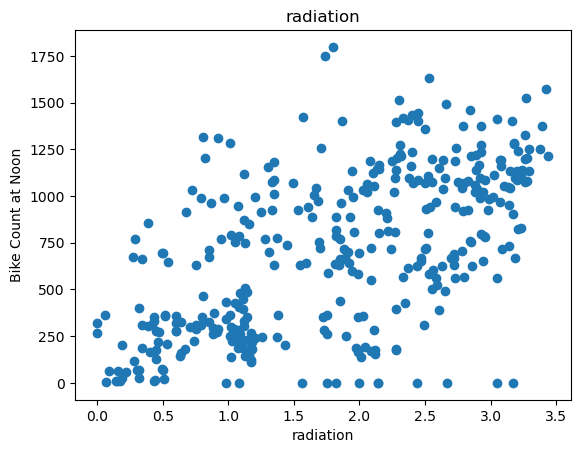

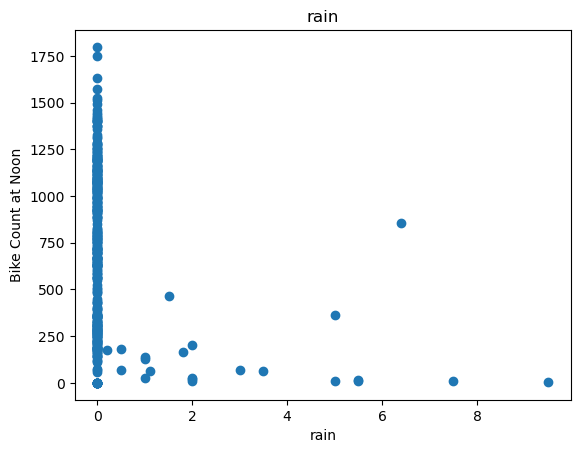

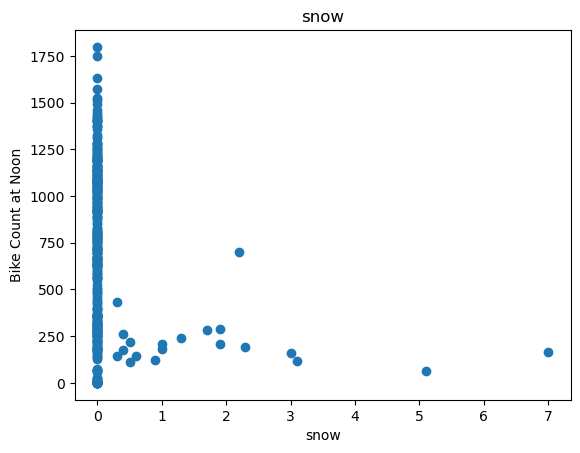

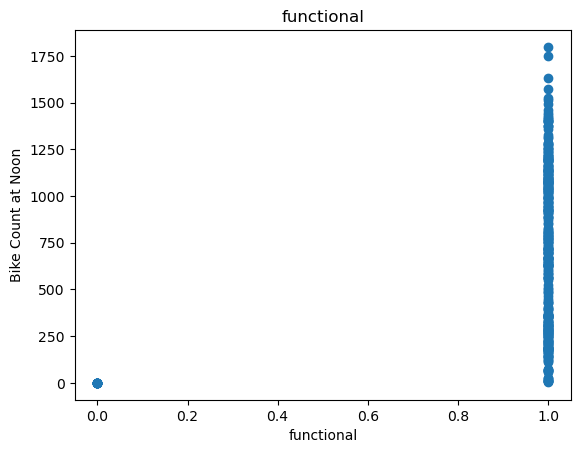

In [62]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike Count at Noon")
    plt.xlabel(label)
    plt.show()

In [63]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [64]:
df.head()

bike_count  temp  humidity  dew_pt_temp  radiation  rain  snow
12          449   1.7        23        -17.2       1.11   0.0   0.0
36          479   4.3        41         -7.8       1.09   0.0   0.0
60          333   5.8        85          3.4       0.43   0.0   0.0
84          393  -0.3        38        -12.9       1.11   0.0   0.0
108         321  -2.3        25        -19.7       0.00   0.0   0.0

# Train/valid/test dataset


In [65]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [66]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y)) #juntar dados na sequência 
#https://numpy.org/doc/stable/reference/generated/numpy.hstack.html
    return data, X, y

In [67]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [68]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [69]:
temp_reg.score(X_test_temp, y_test_temp)

0.29746087090007

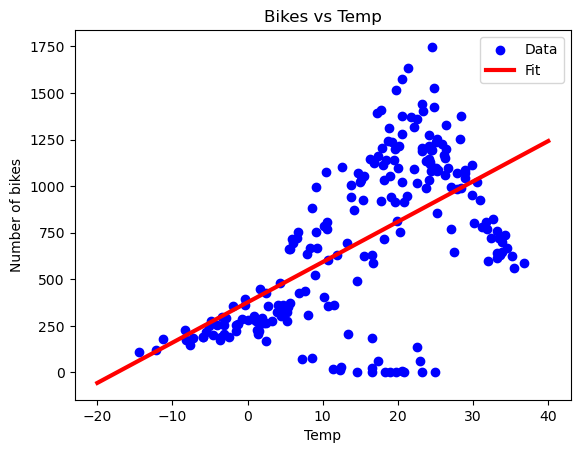

In [70]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [71]:
print(temp_reg.coef_,temp_reg.intercept_ )

[[21.63382938]] [376.5074231]


# Multiple Linear Regression

In [72]:
df.columns


Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [73]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])


In [74]:
#treinar, testar e validar todos x_labels, com entrada x_labels => todos menos bike_count 
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [75]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [76]:
all_reg.score(X_test_all, y_test_all)

0.3938370803999037

In [77]:
y_pred_lr = all_reg.predict(X_test_all)

In [78]:
y_pred_lr

array([[1036.69783511],
       [ 755.49796337],
       [1013.14849562],
       [ 572.1366988 ],
       [ 938.46083734],
       [ 739.00833184],
       [1041.9462243 ],
       [ 698.42268063],
       [ 470.00261528],
       [ 928.95805646],
       [ 462.99594394],
       [ 782.78345598],
       [1049.05390656],
       [ 214.97548933],
       [ 408.96010015],
       [ 933.01800596],
       [ 663.97418121],
       [ 744.27967253],
       [ 992.26512753],
       [ 788.26107185],
       [1154.56564503],
       [1144.2709848 ],
       [ 731.18158276],
       [ 371.90949142],
       [ 178.55964163],
       [1084.33020085],
       [-278.96174608],
       [ 460.56456769],
       [ 270.9358231 ],
       [1137.09378536],
       [ 343.10919225],
       [1010.85303928],
       [ 579.44742318],
       [ 519.81927304],
       [1141.51189528],
       [ 582.31222308],
       [ 991.99056975],
       [ 635.45234617],
       [ 712.59308264],
       [ 765.1592592 ],
       [ 206.89796974],
       [ 906.604

# Regression with Neural Net

In [79]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

C:\Users\fcasamento\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [81]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [82]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

In [83]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

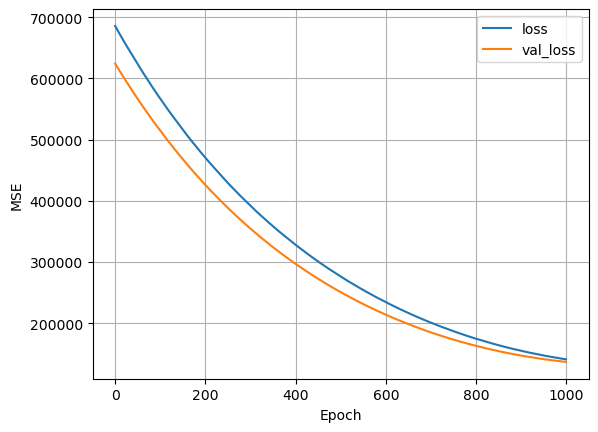

In [84]:
plot_loss(history)

In [85]:
# convergindo os dados loss e val_loss

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000016984DFDD00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


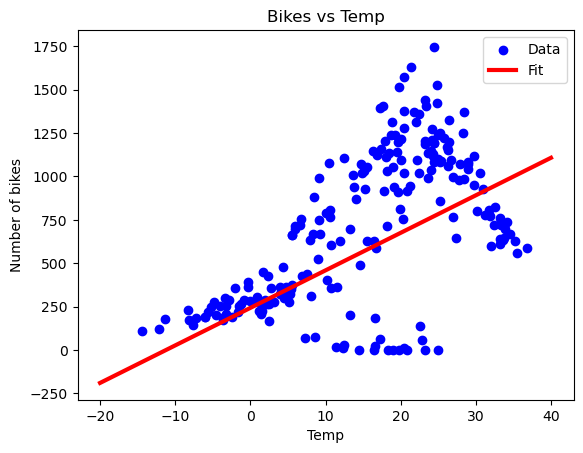

In [86]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# Neural Net

In [87]:

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [88]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=100
)

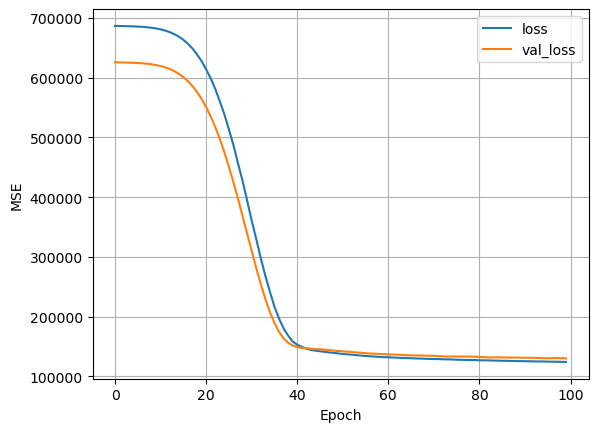

In [89]:
plot_loss(history)

# Correto

In [90]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))


nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')



In [91]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=100
)

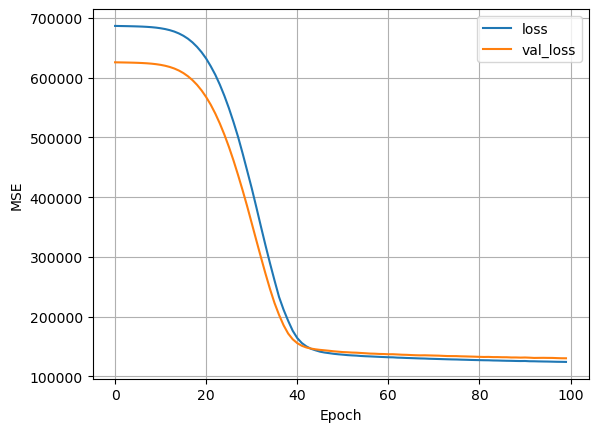

In [92]:
plot_loss(history)

In [93]:
# declina e converge a figura

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


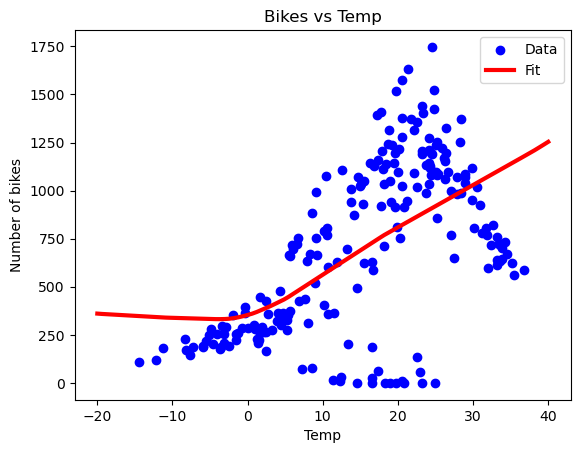

In [94]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
#https://www.geeksforgeeks.org/tensorflow-linspace-in-python/
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [95]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
#all_normalizer = tf.keras.layers.Normalization(input_shape=(6,1), axis=-1)

all_normalizer.adapt(X_train_all)

In [96]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [97]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

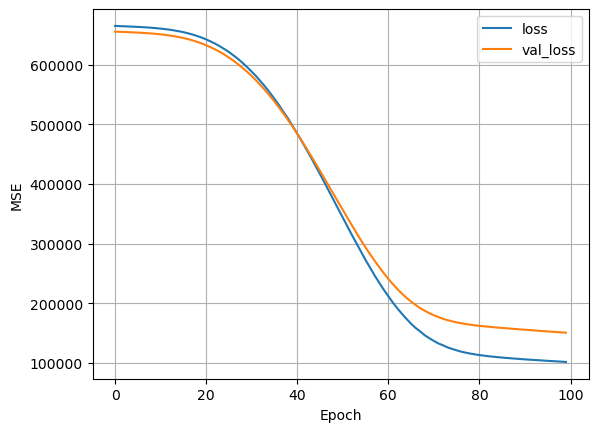

In [98]:
plot_loss(history)

In [99]:
#all_reg.score(X_test_all, y_test_all)
#linear multiple linear regressor
all_reg.predict(X_test_all)

array([[1036.69783511],
       [ 755.49796337],
       [1013.14849562],
       [ 572.1366988 ],
       [ 938.46083734],
       [ 739.00833184],
       [1041.9462243 ],
       [ 698.42268063],
       [ 470.00261528],
       [ 928.95805646],
       [ 462.99594394],
       [ 782.78345598],
       [1049.05390656],
       [ 214.97548933],
       [ 408.96010015],
       [ 933.01800596],
       [ 663.97418121],
       [ 744.27967253],
       [ 992.26512753],
       [ 788.26107185],
       [1154.56564503],
       [1144.2709848 ],
       [ 731.18158276],
       [ 371.90949142],
       [ 178.55964163],
       [1084.33020085],
       [-278.96174608],
       [ 460.56456769],
       [ 270.9358231 ],
       [1137.09378536],
       [ 343.10919225],
       [1010.85303928],
       [ 579.44742318],
       [ 519.81927304],
       [1141.51189528],
       [ 582.31222308],
       [ 991.99056975],
       [ 635.45234617],
       [ 712.59308264],
       [ 765.1592592 ],
       [ 206.89796974],
       [ 906.604

In [100]:
y_pred_lr= all_reg.predict(X_test_all)

In [101]:
# calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [102]:
def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()

In [107]:
MSE(y_pred_lr, y_test_all)

111500.32282272541

In [108]:
MSE(y_pred_nn, y_test_all)

128748.1647569084

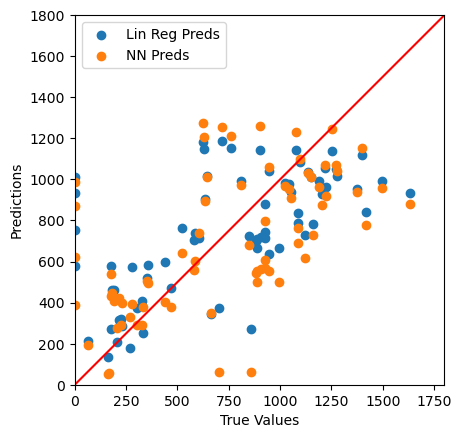

In [109]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")

In [110]:
#03:11:25